In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron, LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# Lendo os arquivos de treinamento e teste
train = pd.read_csv("train.csv",sep=";")
test = pd.read_csv("test.csv",sep=";")


In [ ]:
def extract_features(data):
    # Calcula a intensidade da imagem
    intensity = np.sum(data)/255
    # Calcula a simetria vertical da imagem
    inversa = np.fliplr(data)
    diferenca = np.abs(data - inversa)
    simetria_vertical = np.sum(diferenca)/(255*2)
    # Calcula a simetria horizontal da imagem
    data_hor = np.transpose(data)
    inversa_hor = np.fliplr(data_hor)
    diferenca_hor = np.abs(data_hor - inversa_hor)
    simetria_horizontal = np.sum(diferenca_hor)/(255*2)
    simetria_completa = simetria_horizontal + simetria_vertical

    return intensity, simetria_completa

In [ ]:
# Criando novos arquivos de treinamento e teste com informações de intensidade e simetria
train_redu = pd.DataFrame(columns=["label", "intensidade", "simetria"])
test_redu = pd.DataFrame(columns=["label", "intensidade", "simetria"])

for i, row in train.iterrows():
    label = row["label"]
    data = row.drop("label").values.reshape((28, 28))
    intensity, simetry = extract_features(data)
    # Adiciona as informações no novo dataframe
    train_redu.loc[i] = [label,  intensity, simetry]

for i, row in test.iterrows():
    label = row["label"]
    data = row.drop("label").values.reshape((28, 28))
    intensity, simetry = extract_features(data)
    # Adiciona as informações no novo dataframe
    test_redu.loc[i] = [label, intensity, simetry]


# Salvando os novos arquivos de treinamento e teste
train_redu.to_csv("train_redu.csv", index=False)
test_redu.to_csv("test_redu.csv", index=False)


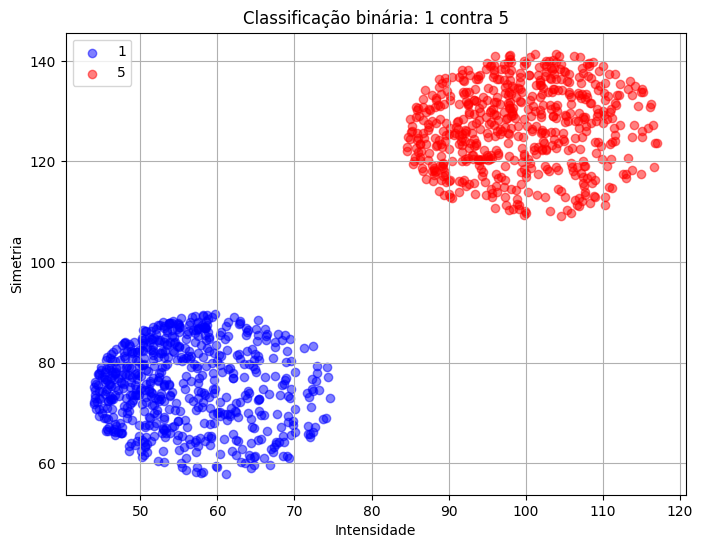

Perceptron:
[[  0 292]
 [  0 291]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       292
         5.0       0.50      1.00      0.67       291

    accuracy                           0.50       583
   macro avg       0.25      0.50      0.33       583
weighted avg       0.25      0.50      0.33       583

Linear Regression:
[[  0 292]
 [  0 291]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       292
         5.0       0.50      1.00      0.67       291

    accuracy                           0.50       583
   macro avg       0.25      0.50      0.33       583
weighted avg       0.25      0.50      0.33       583

Logistic Regression:
[[292   0]
 [  0 291]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       292
         5.0       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macr

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Carrega os dados
train_df = pd.read_csv('train_redu.csv')
test_df = pd.read_csv('test_redu.csv')

# Filtra apenas as imagens com label igual a 1 ou 5
train1x5 = train_df[train_df['label'].isin([1, 5])]
test1x5 = test_df[test_df['label'].isin([1, 5])]

# Criando um gráfico de dispersão para os dados de train1x5
fig, ax = plt.subplots(figsize=(8, 6))
colors = {1: "blue", 5: "red"}
for label, color in colors.items():
    subset = train1x5[train1x5["label"] == label]
    ax.scatter(subset["intensidade"], subset["simetria"], c=color, label=label, alpha=0.5)
ax.set_title(f"Gráfico de dispersão: 1 contra 5")
ax.legend()
ax.grid(True)
ax.set_xlabel("Intensidade")
ax.set_ylabel("Simetria")
plt.show()

# Treina os classificadores
X_train = train1x5[['intensidade', 'simetria']].values
y_train = np.where(train1x5['label']==1, 1, -1)

perceptron = Perceptron()
perceptron.fit(X_train, y_train)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Cria o método de predição do dígito
def predict_digit(classifier, intensidade, simetria):
    y_pred = classifier.predict([[intensidade, simetria]])
    if y_pred == 1:
        return 1
    else:
        return 5

# Testa os classificadores
X_test = test1x5[['intensidade', 'simetria']].values
y_test = test1x5['label'].values

y_pred_perceptron = [predict_digit(perceptron, intensidade, simetria) for intensidade, simetria in X_test]
y_pred_linear_regression = [predict_digit(linear_regression, intensidade, simetria) for intensidade, simetria in X_test]
y_pred_logistic_regression = [predict_digit(logistic_regression, intensidade, simetria) for intensidade, simetria in X_test]

# Gera a matriz de confusão e os relatórios de eficácia de classificação de cada classificador
print('Perceptron:')
print(confusion_matrix(y_test, y_pred_perceptron))
print(classification_report(y_test, y_pred_perceptron))

print('Linear Regression:')
print(confusion_matrix(y_test, y_pred_linear_regression))
print(classification_report(y_test, y_pred_linear_regression))

print('Logistic Regression:')
print(confusion_matrix(y_test, y_pred_logistic_regression))
print(classification_report(y_test, y_pred_logistic_regression))


In [ ]:
# Define as classes
classes = [0, 1, 4, 5]

# Define as funções hipótese
hypotheses = {}

for c in classes:
    # Define a classe c como positiva (+1) e todas as outras classes como negativas (-1)
    y_train = np.where(train_df['label'] == c, 1, -1)

    # Treina o modelo Perceptron para a classe c
    perceptron = Perceptron()
    perceptron.fit(train_df[['intensidade', 'simetria']].values, y_train)

    # Treina o modelo Regressão Linear para a classe c
    linear_regression = LinearRegression()
    linear_regression.fit(train_df[['intensidade', 'simetria']].values, y_train)

    # Treina o modelo Regressão Logística para a classe c
    logistic_regression = LogisticRegression()
    logistic_regression.fit(train_df[['intensidade', 'simetria']].values, y_train)

    # Armazena os modelos treinados para a classe c
    hypotheses[c] = {'perceptron': perceptron,
                     'linear_regression': linear_regression,
                     'logistic_regression': logistic_regression}



In [ ]:
def train_classifiers(train_df, digits):
    classifiers = {}
    for digit in digits:
        print(f'Training classifier for digit {digit}')
        # Preparando dados de treino para classificação binária (1 vs todos)
        train_data = train_df.copy()
        train_data['label'] = np.where(train_data['label'] == digit, 1, -1)
        X_train = train_data.iloc[:, 1:].values
        y_train = train_data.iloc[:, 0].values

        # Treinando modelo de Perceptron
        perceptron = Perceptron()
        perceptron.fit(X_train, y_train)
        classifiers[f'perceptron_{digit}'] = perceptron

        # Treinando modelo de Regressão Logística
        logistic_regression = LogisticRegression()
        logistic_regression.fit(X_train, y_train)
        classifiers[f'logistic_regression_{digit}'] = logistic_regression

        # Treinando modelo de Máquina de Vetores de Suporte (SVM)
        svm = LinearSVC()
        svm.fit(X_train, y_train)
        classifiers[f'svm_{digit}'] = svm

    return classifiers


In [ ]:

X_train = train_df[['intensidade', 'simetria']].values
y_train = np.where(train_df['label'] == 0, 1, -1)

X_test = test_df[['intensidade', 'simetria']].values
y_test = np.where(test_df['label'] == 0, 1, -1)

perceptron0 = Perceptron()
perceptron0.fit(X_train, y_train)

linear_regression0 = LinearRegression()
linear_regression0.fit(X_train, y_train)

logistic_regression0 = LogisticRegression()
logistic_regression0.fit(X_train, y_train)


In [ ]:
# Criando um gráfico de dispersão para todos os dados
fig, ax = plt.subplots(figsize=(8, 6))
colors = {0: "green", 1: "blue", 4: "purple", 5: "red"}
for label, color in colors.items():
    subset = train_df[train_df["label"] == label]
    ax.scatter(subset["intensidade"], subset["simetria"], c=color, label=label, alpha=0.5)
ax.legend()
ax.grid(True)
ax.set_xlabel("Intensidade")
ax.set_ylabel("Simetria")
plt.show()

In [ ]:
# Define y_train_0 como +1 para os exemplos com label 0 e -1 para os demais
y_train_0 = np.where(train_df['label']==0, 1, -1)

# Remove a coluna label do DataFrame de treino
X_train_0 = train_df.drop('label', axis=1).values

# Define y_test_0 como +1 para os exemplos com label 0 e -1 para os demais
y_test_0 = np.where(train_df['label']==0, 1, -1)

# Remove a coluna label do DataFrame de testes
X_test_0 = train_df.drop('label', axis=1).values